In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from lane_detection import *
from lane_following import *
from math import *

In [2]:
img = cv2.imread("/home/keshav/cv-intro/media/rov_pool.jpeg")

In [3]:
lines = detect_lines(img, 49, 50, 3, 500, 40)
print(lines)

[[[ 805  475 1138 1053]]

 [[1325  478 1895  685]]

 [[ 751  506  920 1061]]]


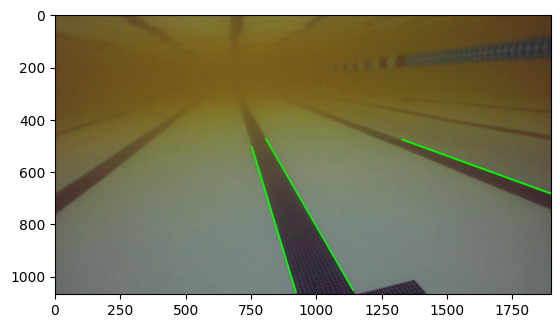

In [4]:
plt.imshow(draw_lines(img, lines))

In [5]:
get_slopes_intercepts(lines)

([1.7357357357357357, 0.3631578947368421, 3.2840236686390534],
 [1775.7698961937717, 5956.59420289855, 1254.6504504504505])

In [6]:
lanes = detect_lanes(lines)
print(lanes)

[[[1775.7698961937717, 2160, 670.4402235662722, 241.43978745136724], [1254.6504504504505, 2160, 670.4402235662722, 241.43978745136724]]]


1
___
[[1775.7698961937717, 2160, 670.4402235662722, 241.43978745136724], [1254.6504504504505, 2160, 670.4402235662722, 241.43978745136724]]
___
[[1775.7698961937717, 2160, 670.4402235662722, 241.43978745136724], [1254.6504504504505, 2160, 670.4402235662722, 241.43978745136724]]


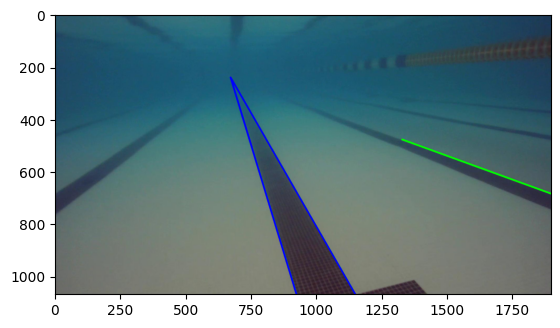

In [7]:
print(len(lanes))
lane_img = draw_lanes(img, lanes)
plt.imshow(cv2.cvtColor(lane_img, cv2.COLOR_BGR2RGB))
plt.show()

[[[1775.7698961937717, 2160, 670.4402235662722, 241.43978745136724], [1254.6504504504505, 2160, 670.4402235662722, 241.43978745136724]]]


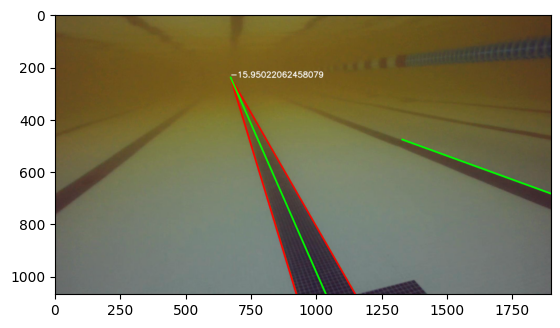

In [8]:
print(lanes)
center_lane = get_center_lane(lanes)
x = center_lane[0][2]
y = center_lane[0][3]
intercept, slope = get_lane_center(get_center_lane(lanes))

cv2.line(img, (int(intercept), 2160), (int(x),int(y)), (0,255,0), 5)
bottom_leg = x - intercept
right_leg = y
angle = atan(right_leg / bottom_leg)
cv2.putText(img, str(np.rad2deg(angle)), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
plt.imshow(img)

In [9]:
video = cv2.VideoCapture('/home/keshav/cv-intro/media/AUV_Vid1.mkv')

fps = int(video.get(cv2.CAP_PROP_FPS))
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

output_file = 'output_video.avi'
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_video = cv2.VideoWriter(output_file, fourcc, 30, (width, height))

ret = True
while ret:
    ret, frame = video.read()
    lines = detect_lines(frame, 50, 90, 3,150,10)
    print(lines)
        #try: 
        #    frame = draw_lines(frame, lines,(0, 255, 0))
        #    print ("tried to draw lines")
        #except :
       #     pass
    try:
        lanes = detect_lanes(lines)
        # print ("tried to detect lanes")
        closest_lane = get_center_lane(lanes)
        frame = draw_lane(frame, closest_lane, (255, 0, 0))
        frame = draw_lines(frame, lines,(0, 255, 0))
        avg_x_intercept, avg_slope = get_lane_center(closest_lane)
        x = closest_lane[0][2]
        y = closest_lane[0][3]
        cv2.line(frame, (int(avg_x_intercept), 1080), (int(x), int(y)), (0,0,255), 3)
        print(recommend_direction(avg_x_intercept, avg_slope))
        plt.imshow(frame)
        output_video.write(frame)
    except:
        pass
        
        
    # recommend_direction(avg_x_intercept, avg_slope)
    

video.release()
output_video.release()

[[[1288  757 1704  933]]

 [[1597  887 1845  992]]

 [[1725  887 1898  950]]]
go left + turn right
[[[1384  797 1702  932]]

 [[1707  933 1892 1011]]

 [[1727  887 1908  953]]]
go left + turn right
[[[1687  924 1839  989]]

 [[1374  793 1741  948]]

 [[1532  815 1884  944]]]
go left + turn right
[[[1618  847 1897  948]]

 [[1557  869 1845  991]]]
go left + turn right
[[[1308  764 1714  936]]

 [[1531  814 1775  903]]

 [[1413  808 1792  969]]]
go left + turn right
[[[1543  818 1899  947]]

 [[1404  804 1740  946]]]
go left + turn right
[[[1567  826 1915  953]]

 [[1520  853 1697  928]]]
go left + turn right
[[[1765  897 1916  952]]

 [[1554  821 1718  881]]

 [[1549  864 1725  938]]]
go left + turn right
[[[1518  807 1700  873]]

 [[1731  884 1919  952]]

 [[1611  890 1837  982]]]
go left + turn right
[[[1575  875 1917 1013]]

 [[1541  814 1897  943]]]
go left + turn right
[[[1547  862 1918 1012]]

 [[1526  808 1825  917]]

 [[1489  838 1673  912]]

 [[1655  854 1915  949]]]
go left + 

/home/keshav/cv-intro/lane_detection/lane_detection.py:35: RuntimeWarning: divide by zero encountered in scalar divide
  slope = (y2 - y1) / (x2 - x1)
/home/keshav/cv-intro/lane_detection/lane_detection.py:71: RuntimeWarning: invalid value encountered in scalar divide
  x = (slopes[i] * intercepts[i] - slopes[j] * intercepts[j]) / (
/home/keshav/cv-intro/lane_detection/lane_detection.py:54: RuntimeWarning: invalid value encountered in scalar divide
  slope_ratio = abs(min_slope / max_slope)


[[[ 843 1078 1026  599]]

 [[1114  529 1209  979]]

 [[1110  787 1125 1079]]

 [[1115  777 1131 1079]]

 [[1091 1019 1091  772]]

 [[1129  792 1159 1076]]]
go forward + turn right
[[[1111  527 1176  835]]

 [[ 839 1079  953  781]]

 [[ 925  853  989  686]]

 [[ 967 1074 1020  800]]

 [[ 960 1076 1009  824]]

 [[1118  857 1130 1077]]]
go forward + turn right
[[[ 838 1071 1022  591]]

 [[1135  648 1181  863]]

 [[ 957 1078 1007  817]]]
go forward + turn right
[[[ 832 1076 1017  594]]

 [[ 954 1079 1014  768]]

 [[ 989 1065 1030  775]]

 [[1128  623 1201  966]]

 [[1032 1021 1055  760]]]
go forward + turn right
[[[ 904  879 1024  566]]

 [[ 990 1079 1024  843]]

 [[1025 1002 1046  767]]]
go right + turn left
[[[ 823 1078 1020  566]]

 [[ 917  837 1008  599]]

 [[ 981 1079 1007  896]]

 [[1124  635 1169  834]]

 [[1131  900 1151 1066]]

 [[1124  792 1155 1046]]

 [[1103  766 1119 1008]]

 [[1015 1077 1037  829]]

 [[ 988 1079 1021  842]]

 [[1053  980 1059  795]]

 [[ 883 1079  956  824]]]

/home/keshav/cv-intro/lane_detection/lane_detection.py:36: RuntimeWarning: divide by zero encountered in scalar divide
  x_intercept = (res - y2) / slope + x2
/home/keshav/cv-intro/lane_detection/lane_detection.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  slope_ratio = abs(min_slope / max_slope)
/home/keshav/cv-intro/lane_detection/lane_detection.py:55: RuntimeWarning: divide by zero encountered in scalar divide
  slope_difference = abs(1 / slopes[i] - 1 / slopes[j])


[[[ 212  926  385  776]]

 [[ 552  917  655  687]]

 [[1394  438 1707  438]]]
go right + turn left
[[[  64 1036  295  842]]

 [[ 528  941  643  694]]

 [[ 464 1079  552  890]]

 [[1495  414 1668  411]]]
go right + turn left
[[[ 122  976  321  809]]

 [[ 501  972  639  689]]

 [[ 116  980  387  753]]

 [[ 485 1001  603  759]]]
go right + turn left
[[[  83 1001  376  756]]

 [[ 516  921  629  699]]

 [[  12 1055  173  924]]]
go right + turn left
[[[105 979 291 828]]

 [[210 891 371 761]]

 [[211 890 370 761]]

 [[497 942 626 700]]]
go right + turn left
[[[   8 1056  171  924]]

 [[ 132  954  350  778]]

 [[  64 1012  275  841]]]
[[[   1 1067  294  830]]

 [[ 506  910  612  720]]

 [[ 321  810  498  666]]]
go right + turn left
[[[   3 1078  165  947]]

 [[  48 1039  306  830]]

 [[ 430 1043  597  754]]]
go right + turn left
[[[  76 1029  253  890]]

 [[ 383 1063  531  835]]]
go right + turn left
[[[ 417 1078  584  801]]

 [[ 421 1074  646  699]]]
[[[ 430 1079  572  843]]]
None
None
None
N